# Project-CMSC6950

In [1]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# change directory
%cd drive
%cd MyDrive
%cd Colab\ Notebooks
%cd Project-COMP 6950

/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks/Project-COMP 6950


In [3]:
import os
import itertools
import numpy as np
import pandas as pd

from dataset import Dataset
from model import LeNet,AlexNet

In [4]:
#read , preprocess, and split dataset to (train, validation, test)
dataset_cifar = Dataset('cifar-10','./dataset')
dataset_mnist = Dataset('mnist','./dataset')

In [5]:
# let's explore the number of examples in datasets
dataset_cifar.num_example

{'test': 10000, 'train': 45000, 'val': 5000}

In [6]:
dataset_mnist.num_example

{'test': 10000, 'train': 54000, 'val': 6000}

In [7]:
#size of images in CIFAR-10 dataset
dataset_cifar.dataset['train']['input'].shape[1:]

(32, 32, 3)

In [8]:
#size of images in MNIST dataset
dataset_mnist.dataset['train']['input'].shape[1:]

(28, 28, 1)

In [9]:
#define function for showing images in datasets
import matplotlib.pyplot as plt
def plot(data):
    X = data.dataset['train']['input']
    y = data.dataset['train']['label']
    plt.figure(figsize=(10,10))
    if X.shape[-1] == 1:
      for i in range(16):
         plt.subplot(4,4,i+1)
         i = np.random.randint(10000)
         X_im = np.reshape(X[i], [28,28])
         plt.imshow(X_im, cmap=plt.cm.gray_r)
         plt.axis('off')
         plt.title('Label: {}'.format(y[i]))
    else:
       for i in range(16):
          plt.subplot(4,4,i+1)
          i = np.random.randint(10000)
          plt.imshow(X[i,])
          plt.title('Label: {}'.format(y[i,]))
          plt.axis('off')

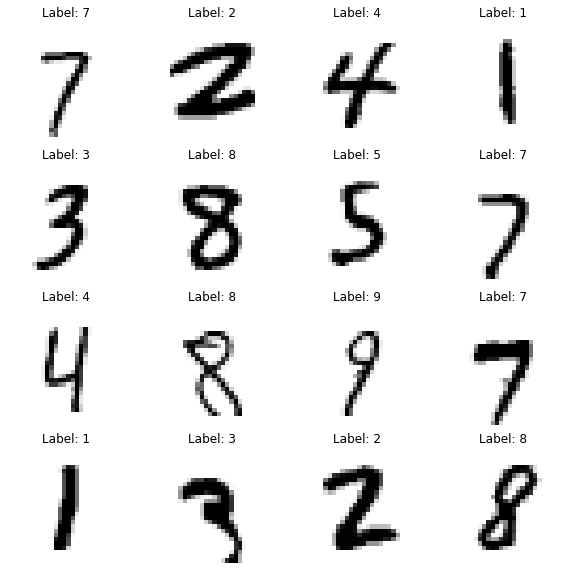

In [10]:
plot(dataset_mnist)

In [11]:
dataset_rawcifar = Dataset('Raw_cifar','./dataset')

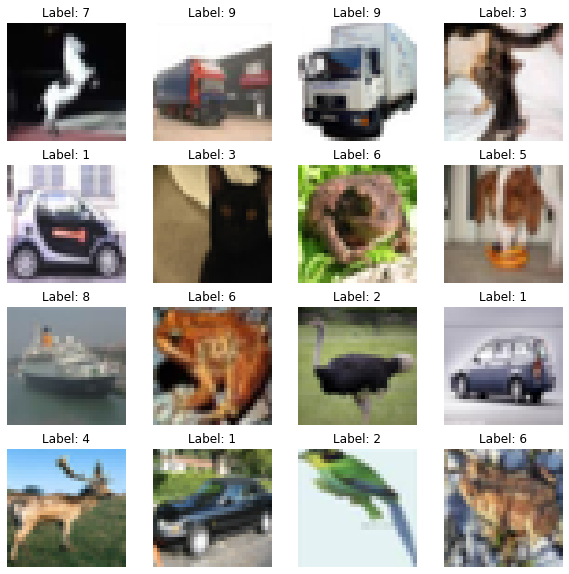

In [12]:
plot(dataset_rawcifar)

## classification using deep neural network_LeNet

In [13]:
from dataset import Dataset

In [14]:
dataset_cifar = Dataset('cifar-10','./dataset')
dataset_mnist = Dataset('mnist','./dataset')
# LeNet Architecture for CIFAR and MNIST
arch1 = LeNet(10, 'cifar', dataset_cifar.dataset, 128)
arch2 = LeNet(10, 'mnist', dataset_mnist.dataset, 128)

### LeNet on CIFAR

In [15]:
#train model with cifar dataset
arch1.compile_model()

Epoch 1/30
352/352 [==============================] - 12s 5ms/step - loss: 1.8943 - accuracy: 0.3255 - val_loss: 1.7361 - val_accuracy: 0.3828
Epoch 2/30
352/352 [==============================] - 1s 4ms/step - loss: 1.6577 - accuracy: 0.4156 - val_loss: 1.5960 - val_accuracy: 0.4282
Epoch 3/30
352/352 [==============================] - 1s 4ms/step - loss: 1.4986 - accuracy: 0.4635 - val_loss: 1.4753 - val_accuracy: 0.4682
Epoch 4/30
352/352 [==============================] - 1s 4ms/step - loss: 1.4026 - accuracy: 0.4938 - val_loss: 1.3912 - val_accuracy: 0.4980
Epoch 5/30
352/352 [==============================] - 1s 4ms/step - loss: 1.3381 - accuracy: 0.5166 - val_loss: 1.3699 - val_accuracy: 0.5038
Epoch 6/30
352/352 [==============================] - 1s 4ms/step - loss: 1.2894 - accuracy: 0.5344 - val_loss: 1.3140 - val_accuracy: 0.5296
Epoch 7/30
352/352 [==============================] - 1s 4ms/step - loss: 1.2511 - accuracy: 0.5510 - val_loss: 1.2899 - val_accuracy: 0.5398
Epoch

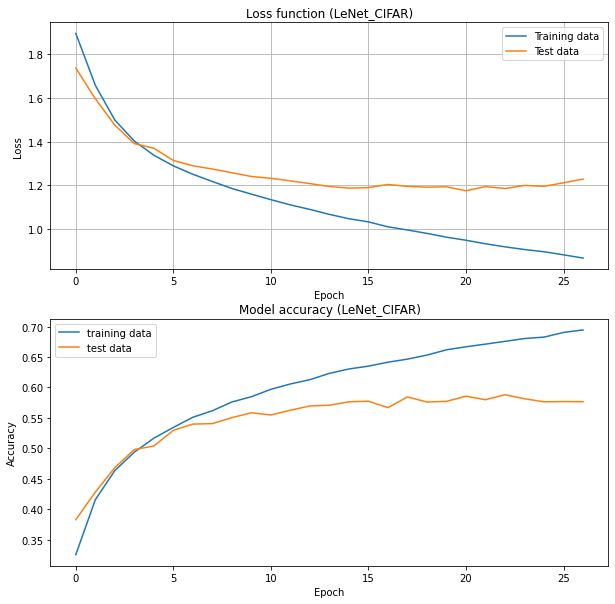

In [16]:
# plot amount of loss function and accuracy for training data and test in different epochs
arch1.plot_hist()

In [17]:
import pandas as pd
ser1 = pd.Series({'accuracy': arch1.accuracy()[0], 'number of epoch': int(arch1.accuracy()[1])})
ser1.name = 'Lenet_CIFAR'

### LeNet on MNIST

In [18]:
#train model
arch2.compile_model()

Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 0.6310 - accuracy: 0.8495 - val_loss: 0.2072 - val_accuracy: 0.9448
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1439 - accuracy: 0.9605 - val_loss: 0.1065 - val_accuracy: 0.9698
Epoch 3/30
422/422 [==============================] - 1s 4ms/step - loss: 0.0837 - accuracy: 0.9770 - val_loss: 0.0730 - val_accuracy: 0.9795
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0613 - accuracy: 0.9827 - val_loss: 0.0610 - val_accuracy: 0.9818
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0490 - accuracy: 0.9861 - val_loss: 0.0526 - val_accuracy: 0.9847
Epoch 6/30
422/422 [==============================] - 1s 4ms/step - loss: 0.0404 - accuracy: 0.9884 - val_loss: 0.0494 - val_accuracy: 0.9857
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0351 - accuracy: 0.9899 - val_loss: 0.0472 - val_accuracy: 0.9870
Epoch 

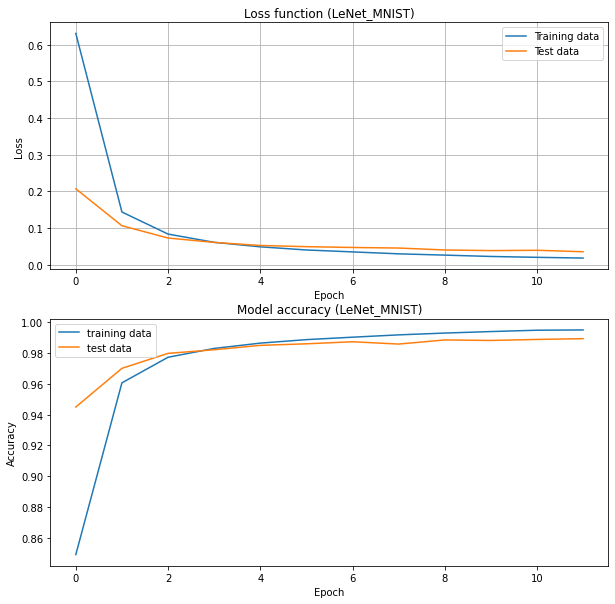

In [19]:
# plot amount of loss function and accuracy for training data and test in different epochs
arch2.plot_hist()

In [20]:
ser2 = pd.Series({'accuracy': arch1.accuracy()[0], 'number of epoch': int(arch1.accuracy()[1])})
ser2.name = 'Lenet_MNIST'

## classification using deep neural network_AlexNet

In [21]:
dataset_cifar = Dataset('cifar-10','./dataset')
dataset_mnist = Dataset('mnist','./dataset')
arch3 = AlexNet(10, 'cifar', dataset_cifar.dataset, 128)
arch4 = AlexNet(10, 'mnist', dataset_mnist.dataset, 128)

### AlexNet on CIFAR

In [22]:
arch3.compile_model()

Epoch 1/30
352/352 [==============================] - 7s 18ms/step - loss: 1.6492 - accuracy: 0.3857 - val_loss: 1.3895 - val_accuracy: 0.4876
Epoch 2/30
352/352 [==============================] - 6s 17ms/step - loss: 1.2510 - accuracy: 0.5431 - val_loss: 1.2018 - val_accuracy: 0.5750
Epoch 3/30
352/352 [==============================] - 6s 17ms/step - loss: 1.0497 - accuracy: 0.6242 - val_loss: 1.0092 - val_accuracy: 0.6438
Epoch 4/30
352/352 [==============================] - 6s 17ms/step - loss: 0.9006 - accuracy: 0.6839 - val_loss: 0.9163 - val_accuracy: 0.6822
Epoch 5/30
352/352 [==============================] - 6s 17ms/step - loss: 0.7828 - accuracy: 0.7219 - val_loss: 0.9238 - val_accuracy: 0.6852
Epoch 6/30
352/352 [==============================] - 6s 17ms/step - loss: 0.6959 - accuracy: 0.7527 - val_loss: 0.8221 - val_accuracy: 0.7268
Epoch 7/30
352/352 [==============================] - 6s 17ms/step - loss: 0.6011 - accuracy: 0.7860 - val_loss: 0.8155 - val_accuracy: 0.7220

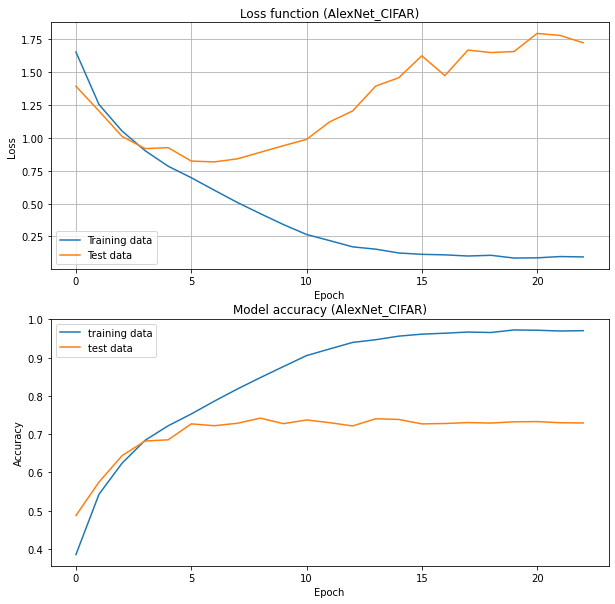

In [23]:
arch3.plot_hist()

In [24]:
ser3 = pd.Series({'accuracy': arch3.accuracy()[0], 'number of epoch': int(arch3.accuracy()[1])})
ser3.name = 'AlexNet_CIFAR'

### AlexNet-MNIST

In [25]:
# train model
arch4.compile_model()

Epoch 1/30
422/422 [==============================] - 8s 17ms/step - loss: 0.4234 - accuracy: 0.8566 - val_loss: 0.1161 - val_accuracy: 0.9633
Epoch 2/30
422/422 [==============================] - 7s 16ms/step - loss: 0.0952 - accuracy: 0.9704 - val_loss: 0.0847 - val_accuracy: 0.9737
Epoch 3/30
422/422 [==============================] - 7s 16ms/step - loss: 0.0661 - accuracy: 0.9799 - val_loss: 0.0592 - val_accuracy: 0.9825
Epoch 4/30
422/422 [==============================] - 7s 16ms/step - loss: 0.0522 - accuracy: 0.9838 - val_loss: 0.0510 - val_accuracy: 0.9845
Epoch 5/30
422/422 [==============================] - 7s 16ms/step - loss: 0.0443 - accuracy: 0.9868 - val_loss: 0.0458 - val_accuracy: 0.9868
Epoch 6/30
422/422 [==============================] - 7s 16ms/step - loss: 0.0391 - accuracy: 0.9883 - val_loss: 0.0499 - val_accuracy: 0.9823
Epoch 7/30
422/422 [==============================] - 7s 16ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0739 - val_accuracy: 0.9782

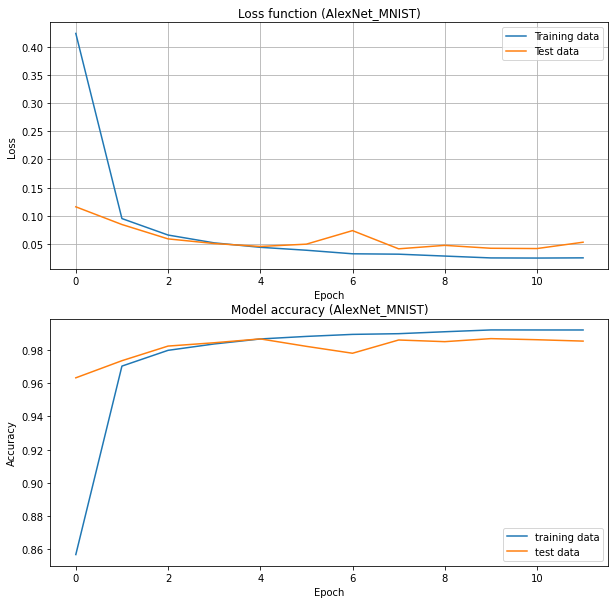

In [26]:
arch4.plot_hist()

In [27]:
ser4 = pd.Series({'accuracy': arch4.accuracy()[0], 'number of epoch': int(arch4.accuracy()[1])})
ser4.name = 'AlexNet_MNIST'

### Compare the results

In [28]:
comparedf = pd.DataFrame([ser1, ser2, ser3, ser4])
comparedf

,accuracy,number of epoch
Lenet_CIFAR,0.5786,27.0
Lenet_MNIST,0.5786,12.0
AlexNet_CIFAR,0.7305,23.0
AlexNet_MNIST,0.9895,12.0


## writing processed data in csv file

In [32]:
dataset_cifar = Dataset('cifar-10','./dataset')
dataset_mnist = Dataset('mnist','./dataset')

In [34]:
dataset_mnist.dataset['train']['input'].shape

(54000, 28, 28, 1)

In [41]:
x_train = np.squeeze(dataset_mnist.dataset['train']['input'])
x_train2 = x_train.reshape(-1, 784)
x_train2.shape

(54000, 784)

In [50]:
df = pd.DataFrame(x_train2)
df.to_csv('traindata.csv', index=False, header=False)

In [51]:
y_train = np.squeeze(dataset_mnist.dataset['train']['label'])
df2 = pd.DataFrame(y_train)
df2.to_csv('trainlabel.csv', index=False, header=False)

### Image Manipulation using scipy 

In [52]:
from scipy import ndimage

#### geometrical Transformation

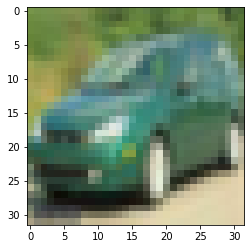

In [53]:
i = np.random.randint(20)
dataset_rawcifar = Dataset('Raw_cifar','./dataset')
img = dataset_rawcifar.dataset['train']['input'][i]
plt.imshow(img)

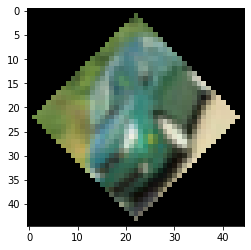

In [54]:
rotate_img = ndimage.rotate(img, 45)
plt.imshow(rotate_img)

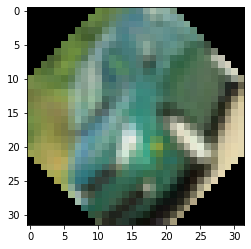

In [55]:
rotate_img_noreshape = ndimage.rotate(img, 45, reshape=False)
plt.imshow(rotate_img_noreshape)

#### image filtering-bluring

In [56]:
blurred_img = ndimage.gaussian_filter(img, sigma=1)
very_blurred = ndimage.gaussian_filter(img, sigma=3)


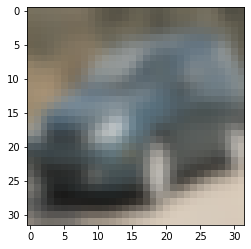

In [57]:
plt.imshow(blurred_img)

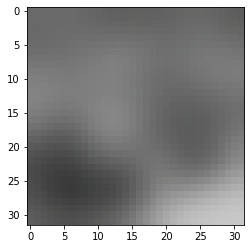

In [58]:
plt.imshow(very_blurred)

#### Sharpen a blured image

In [59]:
#increase the weight of edges by adding an approximation of the Laplacian:
filter_blurred_img = ndimage.gaussian_filter(very_blurred, 1)
alpha = 15
sharpened = very_blurred + alpha * (very_blurred - filter_blurred_img)

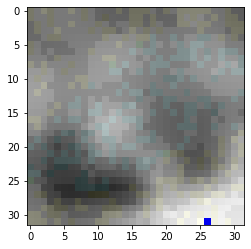

In [60]:
plt.imshow(sharpened)

### reduce the dimensionality of the dataset with t-SNE (t-distributed Stochastic Neighbor Embedding).

In [61]:
from tensorflow import convert_to_tensor, linalg, transpose
from tensorflow import dtypes, tensordot

In [62]:
dataset_mnist = Dataset('mnist','./dataset')
x_train = dataset_mnist.dataset['train']['input']
train_labels = dataset_mnist.dataset['train']['label']

In [63]:
# Convert the dataset into a 2D array of shape 54000 x 784
x = convert_to_tensor(np.reshape(x_train, (x_train.shape[0], -1)),
                      dtype=dtypes.float32)
# Eigen-decomposition from a 784 x 784 matrix
eigenvalues, eigenvectors = linalg.eigh(tensordot(transpose(x), x, axes=1))
# Print the three largest eigenvalues
print('3 largest eigenvalues: ', eigenvalues[-3:])
# Project the data to eigenvectors
x_pca = tensordot(x, eigenvectors, axes=1)

3 largest eigenvalues:  tf.Tensor([ 2130282.   2729296.8 13443304. ], shape=(3,), dtype=float32)


In [64]:
# Choose only the digits 0, 1, 2
total_classes = 3
ind = np.where(train_labels < total_classes)
x_train, train_labels = x_train[ind], train_labels[ind]
# Verify the shape of training data
total_examples, img_length, img_width = x_train[:,:,0].shape
print('Training data has ', total_examples, 'images')
print('Each image is of size ', img_length, 'x', img_width)
 
# Convert the dataset into a 2D array of shape 18623 x 784
x = convert_to_tensor(np.reshape(x_train, (x_train.shape[0], -1)),
                      dtype=dtypes.float32)
# Eigen-decomposition from a 784 x 784 matrix
eigenvalues, eigenvectors = linalg.eigh(tensordot(transpose(x), x, axes=1))
# Print the three largest eigenvalues
print('3 largest eigenvalues: ', eigenvalues[-3:])
# Project the data to eigenvectors
x_pca = tensordot(x, eigenvectors, axes=1)

Training data has  16733 images
Each image is of size  28 x 1
3 largest eigenvalues:  tf.Tensor([ 798430.56 1844602.5  4345353.5 ], shape=(3,), dtype=float32)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


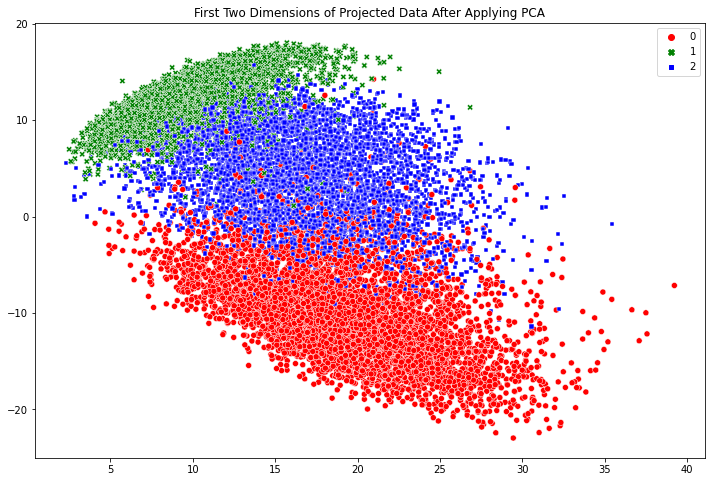

In [65]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x_pca[:, -1], x_pca[:, -2],
                style=train_labels, hue=train_labels,
                palette=["red", "green", "blue"])
plt.title('First Two Dimensions of Projected Data After Applying PCA')
plt.show()

In [66]:
from bokeh.plotting import figure, show

In [67]:
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)

In [68]:
colormap = {0: "red", 1:"green", 2:"blue"}
my_scatter = figure(title="First Two Dimensions of Projected Data After Applying dimensionality reduction", 
                    x_axis_label="Dimension 1",
                    y_axis_label="Dimension 2")
for digit in [0, 1, 2]:
    selection = x_pca[train_labels == digit]
    my_scatter.scatter(selection[:,-1].numpy(), selection[:,-2].numpy(),
                       color=colormap[digit], size=5,
                       legend_label="Digit "+str(digit))
my_scatter.legend.click_policy = "hide"
show(my_scatter)